In [ ]:
'''
This notebook generates the figures for PBMC dataset.
 - Figure 1 : PBMC cross-validation experiment confusion matrix
 - Figure 2 : PBMC cross-validation experiment metric score distribution
 - Figure 3 : PBMC cross-validation experiment metric score distribution per cell type
'''

In [1]:
#!/usr/bin/env python

import os
import sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [2]:
from scripts import config as src
import numpy as np
import pandas as pd
import datetime as dt
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

FIGURE_TITLE_SIZE = 18
SUBPLOT_TITLE_SIZE = 16
LEGEND_TITLE_SIZE = 14
FONT_SIZE = 12

plt.rc('font', size=16) # controls default text sizes
plt.rc('axes', titlesize=SUBPLOT_TITLE_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE) # legend fontsize
plt.rc('legend', title_fontsize=LEGEND_TITLE_SIZE) # legend fontsize
plt.rc('figure', titlesize=FIGURE_TITLE_SIZE) # fontsize of the figure title

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
experiment = 'exper_pbmc'
loc_output = os.path.join(src.DIR_REPORTS, 'evaluate_rskf', experiment)
detail_='circuits**'
print(loc_output)

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2


In [4]:
# overall performance of proposed network
df_metric_overall = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_overall*{detail_}'))):
    print(i)
    df_metric_overall = pd.concat([df_metric_overall, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/metrics_overall_circuits_1_layer_pbmc_sw_log1p_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/metrics_overall_circuits_2_layer_pbmc_sw_log1p_Adam_relu.csv


In [5]:
# the number of calculated metric
df_metric_overall.groupby(['design','metric']).size()

design            metric            
circuits_1_layer  accuracy              500
                  balanced accuracy     500
                  f1-macro              500
                  f1-micro              500
                  f1-weighted           500
                  precision-macro       500
                  precision-micro       500
                  precision-weighted    500
                  recall-macro          500
                  recall-micro          500
                  recall-weighted       500
circuits_2_layer  accuracy              500
                  balanced accuracy     500
                  f1-macro              500
                  f1-micro              500
                  f1-weighted           500
                  precision-macro       500
                  precision-micro       500
                  precision-weighted    500
                  recall-macro          500
                  recall-micro          500
                  recall-weighted      

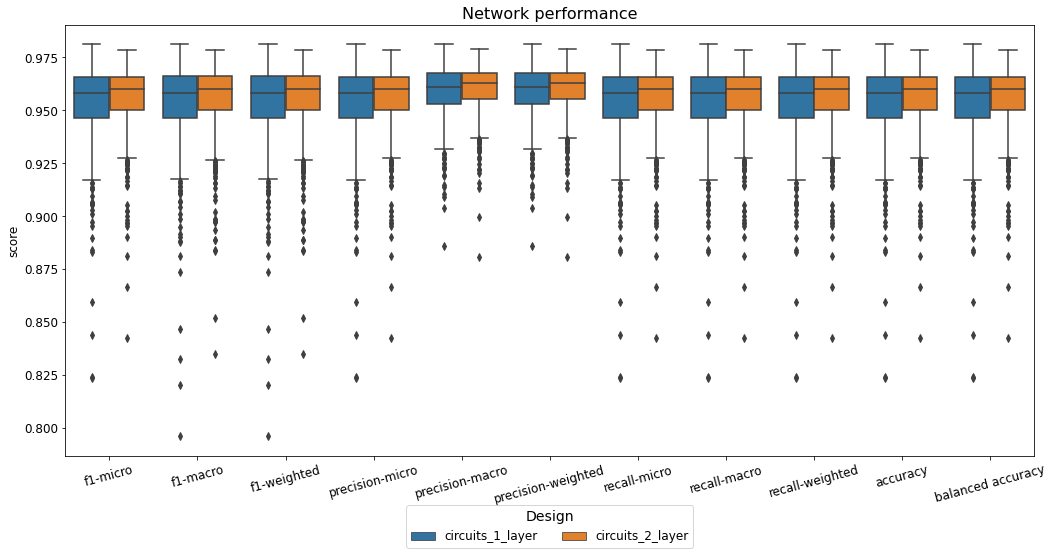

In [6]:
# the boxplot figure for calculated metric
plt.figure(figsize=(15,8))
sns.boxplot(data=df_metric_overall, x='metric', y='score', hue='design');
plt.xticks(rotation=5)
plt.xlabel('')
legend = plt.legend(title='Design', loc='upper center', bbox_to_anchor=(.5, -0.1), ncol= 3 )
plt.xticks(rotation=15)
plt.title('Network performance')
plt.tight_layout();
# exporting figure with different format
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.png')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.pdf')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,(f'1_metrics_{detail_[:-2]}.tiff')), dpi=300, bbox_inches = 'tight', pad_inches=0.1)

In [7]:
# network performance for each cell type
df_metric_detail = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'metrics_*_detail*{detail_}*'))):
    print(i)
    df_metric_detail = pd.concat([df_metric_detail, pd.read_csv(i)])

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/metrics_cell_type_detail_circuits_1_layer_pbmc_sw_log1p_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/metrics_cell_type_detail_circuits_2_layer_pbmc_sw_log1p_Adam_relu.csv


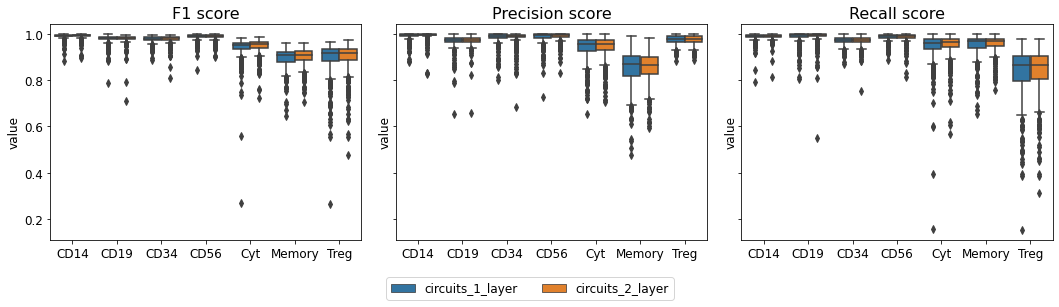

In [8]:
# the boxplot figure of f1, precision and recall metric for each cell type
fig, axes = plt.subplots(ncols=3, figsize=(15,4), sharex=True, sharey=True);
for i_metric, val_metric in enumerate(np.unique(df_metric_detail['metric'])):
    df_temp = df_metric_detail[df_metric_detail['metric']==val_metric]
    sns.boxplot(data=df_temp, x='variable', y='value', hue='design', ax=axes[i_metric]);
    axes[i_metric].set_title(f'{val_metric.capitalize()} score')
    axes[i_metric].set_xlabel('')
    axes[i_metric].set_xticklabels(axes[i_metric].get_xticklabels(), rotation=0)
    legend = axes[i_metric].get_legend()
    legend.remove()
    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.tight_layout();
# exporting figure with different format
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.png'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.pdf'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
plt.savefig(os.path.join(loc_output,f'2_f1_precision_recall_{detail_[:-2]}.tiff'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)

In [9]:
# the mean score of overall performance
df_metric_overall.groupby(['design'
                           , 'metric']).mean().reset_index().pivot(index='design'
                                                                   , columns='metric'
                                                                   , values='score')

metric,accuracy,balanced accuracy,f1-macro,f1-micro,f1-weighted,precision-macro,precision-micro,precision-weighted,recall-macro,recall-micro,recall-weighted
design,,,,,,,,,,,
circuits_1_layer,0.953346,0.953346,0.953018,0.953346,0.953018,0.958489,0.953346,0.958489,0.953346,0.953346,0.953346
circuits_2_layer,0.955517,0.955517,0.955252,0.955517,0.955252,0.959934,0.955517,0.959934,0.955517,0.955517,0.955517


/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/detail_circuits_1_layer_pbmc_sw_log1p_Adam_relu.csv
/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/evaluate_rskf/exper_pbmc_paper2/detail_circuits_2_layer_pbmc_sw_log1p_Adam_relu.csv
DESIGN circuits_1_layer
DESIGN circuits_2_layer


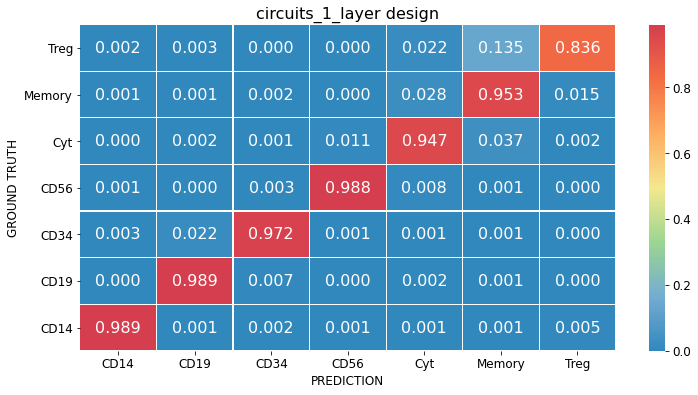

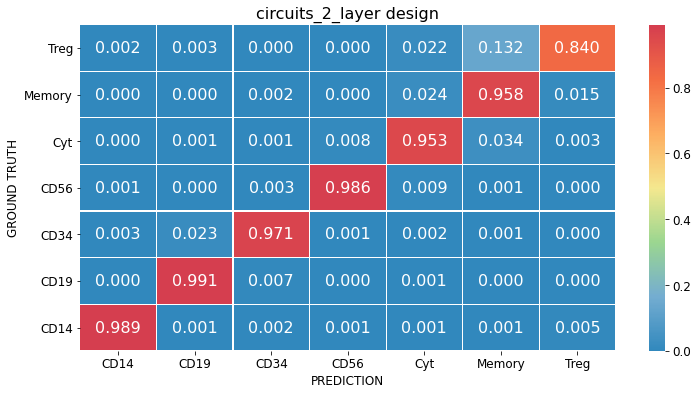

In [10]:
df_result = pd.DataFrame()
for i in sorted(glob.glob(os.path.join(loc_output,f'detail_*{detail_}*'))):
    print(i)
    df_result = pd.concat([df_result, pd.read_csv(i)])
    
for i_design in df_result['design'].unique():
    df_concat = pd.DataFrame()
    print('DESIGN', i_design)
    for i_exp in df_result['index_split'].unique():
        df_temp = df_result[(df_result['index_split']==i_exp) & (df_result['design']==i_design)]
        df_crosstab = pd.crosstab(df_temp['ground_truth'], df_temp['prediction']).div(df_temp['ground_truth'].value_counts(), axis=0)
        df_concat = df_concat.add(df_crosstab, fill_value=0)

#     exporting figure with different format
    plot_cm = src.heatmap_cv(df_concat[::-1]/(i_exp+1), (i_design+' design'),fmt='.3f')
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.png'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.pdf'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)
    plot_cm.savefig(os.path.join(loc_output,'3_cm_'+i_design+'.tiff'), dpi=300, bbox_inches = 'tight', pad_inches=0.1)